# **`Title`**:Sentiment Analysis of Real-time Flipkart Product Reviews

### `Objective`
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Data_Analysis_intern-online_jan_march_IRL_2025\MLOPS\Sentiment Analysis of Real-time Flipkart Product Reviews\Reviews.csv")

In [5]:
df.head(5) # top 5 record

,Reviewer_Name,Review_Title,Review_Location,Upvotes,Downvotes,Review_Month,Review_Text,Rating,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Neutral
4,ASHIK P A,Over priced,NOT ENTERED BY THE USER(EMPTY),147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative


In [101]:
df.shape

(19973, 9)

In [57]:
df.columns

Index(['Reviewer_Name', 'Review_Title', 'Review_Location', 'Upvotes',
       'Downvotes', 'Review_Month', 'Review_Text', 'Rating', 'Sentiment'],
      dtype='object')

In [7]:
# Since we want to implement sentiment analyser, we will consider only three columns
# 'Review_Location', 'Review_Text', 'Sentiment'


sen_df = df.loc[:, ['Review_Location', 'Review_Text', 'Sentiment']]

# 2. Exploratory Data Analysis

In [9]:
sen_df.head(5)

,Review_Location,Review_Text,Sentiment
0,"Certified Buyer, Chirakkal","Nice product, good quality, but price is now r...",Positive
1,"Certified Buyer, Hyderabad",They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,"Certified Buyer, Dharmapuri",Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Certified Buyer, Chennai","Quite O. K. , but nowadays the quality of the...",Neutral
4,NOT ENTERED BY THE USER(EMPTY),Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


In [66]:
sen_df.columns

Index(['Review_Location', 'Review_Text', 'Sentiment'], dtype='object')

In [68]:
sen_df.shape

(19973, 3)

In [70]:
sen_df['Sentiment'].value_counts()

Sentiment
Positive    17076
Negative     1994
Neutral       903
Name: count, dtype: int64

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_10876\3592434902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sen_df, palette='coolwarm')


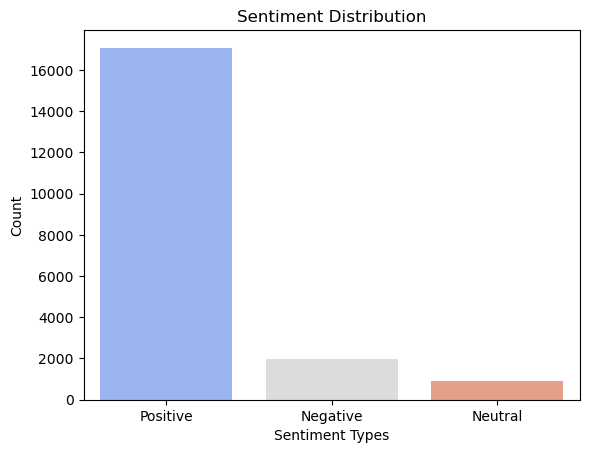

In [82]:
# Plot with a specific palette
sns.countplot(x='Sentiment', data=sen_df, palette='coolwarm')

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Types")
plt.ylabel("Count")
plt.show()

### A word cloud helps visualize the most frequent words in customer reviews

In [11]:
data=df.copy()

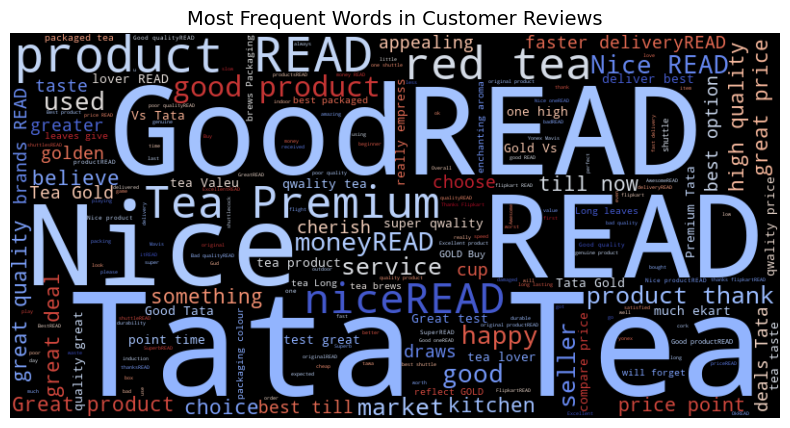

In [92]:
# Combine all review text into a single string
text = " ".join(data['Review_Text'].dropna())

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(text)

# Display the Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Customer Reviews", fontsize=14)
plt.show()

In [13]:
# removing the data where we don't want relevance="not sure".
data = data[data.Sentiment != "Neutral"]

data.shape

(19070, 9)

In [15]:
# convert label to a numerical variable
data['Sentiment'] = data.Sentiment.map({'Positive':1, 'Negative':0}) # relevant is 1, not-relevant is 0. 

# Let us take only the two columns we need
data = data[["Review_Text", "Sentiment"]] 
data.shape

(19070, 2)

In [17]:
data.head()

,Review_Text,Sentiment
0,"Nice product, good quality, but price is now r...",1
1,They didn't supplied Yonex Mavis 350. Outside ...,0
2,Worst product. Damaged shuttlecocks packed in ...,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,0
5,Good quality product. Delivered on time.READ MORE,1


# Step 1 - Identify Input and Output

In [19]:

X = data.Review_Text# the column text contains textual data to extract features from
y = data.Sentiment # this is the column we are learning to predict. 
print(X.shape, y.shape)

(19070,) (19070,)


# Step 2 - Split the Data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14302,) (14302,)
(4768,) (4768,)


# Step 3: Data Preprocessing on train data (X_train)

In [23]:
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
def clean(doc): # doc is a string of text
    
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [27]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 7.34 s
Wall time: 7.4 s
(14302, 3248)


# Step 4: Data Preprocessing on test data (X_test)

In [29]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
%time X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

CPU times: total: 2.28 s
Wall time: 2.28 s
(4768, 3248)


In [31]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # instantiate a vectoriezer
%time X_train_dtm = vect.fit_transform(X_train) # use it to extract features from training data

# transform testing data (using training data's features)
%time X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: total: 6.39 s
Wall time: 6.43 s
CPU times: total: 1.92 s
Wall time: 1.91 s
(14302, 3248) (4768, 3248)


# Step 5 - Building a Model (i.e. Train the classifier)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [35]:
# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_dtm, y_train)

CPU times: total: 46.9 ms
Wall time: 65.7 ms


LogisticRegression()

In [37]:
# make class predictions for X_train_dtm
y_train_pred = classifier.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)


0.9880924766102219

In [39]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 1215,   280],
       [   28, 12779]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

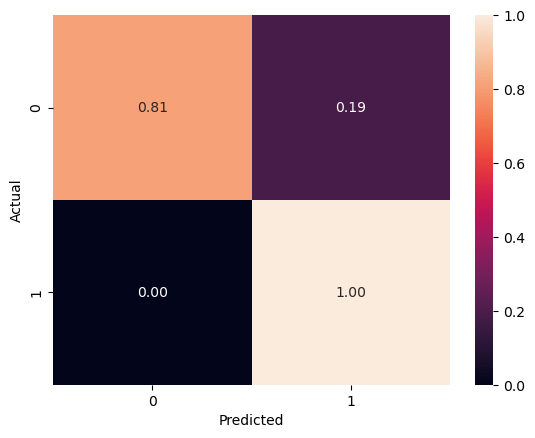

In [41]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Step 7: Evaluate on test data

In [44]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = classifier.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9649748322147651

Text(0.5, 23.52222222222222, 'Predicted')

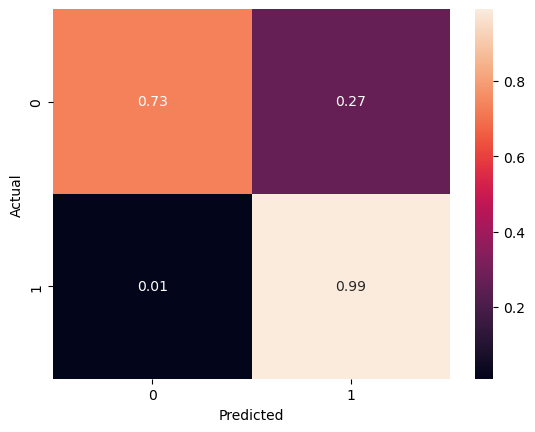

In [46]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [48]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9880924766102219
Test Score (F1 Score): 0.9806645826097025


In [ ]:
# save 

In [54]:
joblib.dump(classifier, "C:\Data_Analysis_intern-online_jan_march_IRL_2025\MLOPS\Sentiment Analysis of Real-time Flipkart Product Reviews\logistic_regression_pipeline.pkl")

['C:\\Data_Analysis_intern-online_jan_march_IRL_2025\\MLOPS\\Sentiment Analysis of Real-time Flipkart Product Reviews\\logistic_regression_pipeline.pkl']

In [90]:
vectorizer_path = r'C:\\Data_Analysis_intern-online_jan_march_IRL_2025\\MLOPS\\Sentiment Analysis of Real-time Flipkart Product Reviews\\count_vectorizer.pkl'

# Save the CountVectorizer
joblib.dump(vect, vectorizer_path)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
